<a href="https://colab.research.google.com/github/MdBilal420/pytorch-fundamentals/blob/main/pytorch_workflows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import matplotlib.pyplot as plt
from torch import nn

In [3]:
weight = 0.6
bias = 0.4

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
Y = weight*X + bias

X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4000],
         [0.4120],
         [0.4240],
         [0.4360],
         [0.4480],
         [0.4600],
         [0.4720],
         [0.4840],
         [0.4960],
         [0.5080]]))

In [4]:
train_split = int(0.80*len(X))
train_split

40

In [5]:
train_X = X[:train_split]
train_Y = Y[:train_split]
test_X = X[train_split:]
test_Y = Y[train_split:]


In [6]:
def plot_predictions(train_data=train_X,train_labels=train_Y,test_data=test_X,test_labels=test_Y,predictions=None):
  plt.figure(figsize=(10,8))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Traininng Data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
  plt.legend(prop={"size":14})




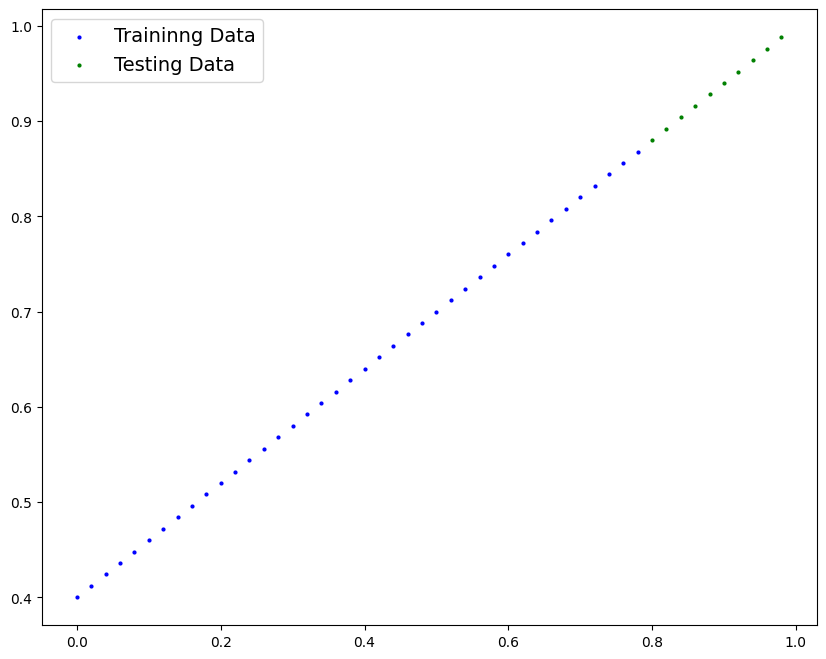

In [7]:
plot_predictions()

In [8]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias



In [9]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight,bias

(0.6, 0.4)

In [12]:
with torch.inference_mode():
  y_preds = model_0(test_X)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [13]:
test_Y

tensor([[0.8800],
        [0.8920],
        [0.9040],
        [0.9160],
        [0.9280],
        [0.9400],
        [0.9520],
        [0.9640],
        [0.9760],
        [0.9880]])

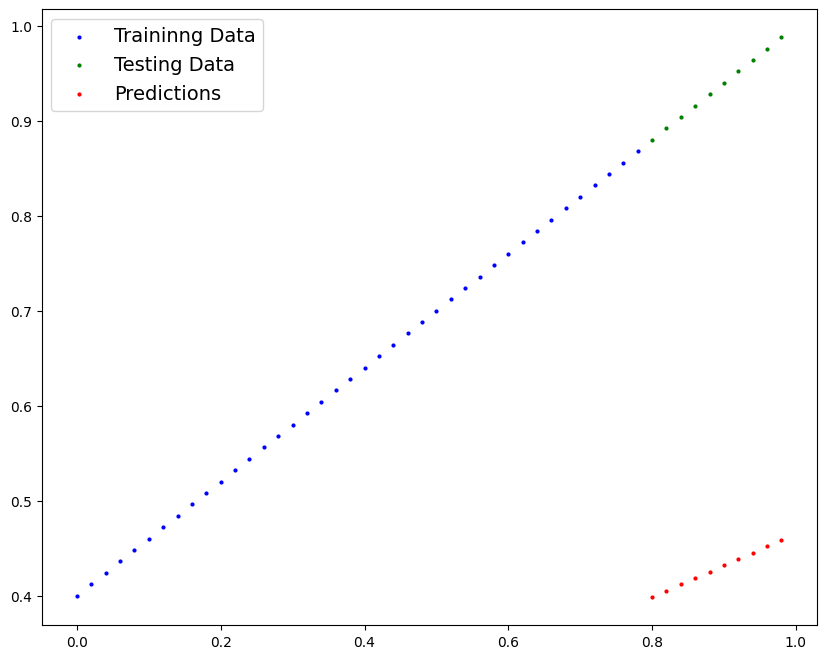

In [14]:
plot_predictions(predictions=y_preds)

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
loss_fn= nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [ ]:
epochs = 10

for epoch in range(epochs):
  #0 train
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(train_X)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, train_Y)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation
  loss.backward()

  # 5. step the optimizer (perform gradient descent)
  optimizer.step()

  # testing
  # model_0.eval()
